需求：在jupyter下对职位信息进行可视化分析；

1. 薪资相关

1）薪资分析

2）不同城市薪资分布

3）N薪分布

4）工作年限与薪资



2. 职位分析

1）不同城市职位数量

2）公司融资情况

3）不同行业公司数量

4）工作经验分析

5）职位标签：词云制作

按顺序依次执行代码块即可\
如有报错,尝试重新从最上方开始运行\


关于词云图：使用了第三方库wordcloud,需要先用pip安装\
或者在压缩包内，有一份叫做wordcloud.jpg的图片文件，打开即可直接查看代码运行后生成的词云图

In [1]:
#导入
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sns;
import re;
#让sns支持中文
sns.set_style({"font.sans-serif":['simhei','Droid Sans Fallback']})

In [2]:
#读取并查看csv文件
df = pd.read_csv("JobData.csv", encoding = "gbk");
df.head()

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage
0,8280292,资深数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,企业服务,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,['数据分析'],...,2021/4/26 10:00,北京,海淀区,NaN,15k-30k,14,3-5年,全职,本科,"发展空间大,弹性工作制,领导Nice"
1,8437217,数据分析实习生,北京字节跳动网络技术有限公司,字节跳动,2000人以上,D轮及以上,"内容资讯,短视频","['扁平管理', '弹性工作', '就近租房补贴', '六险一金']",开发|测试|运维类,['后端开发'],...,2021/4/28 5:18,北京,海淀区,NaN,3k-6k,0,在校/应届,实习,本科,"下午茶,健身瑜伽,免费三餐,弹性工作"
2,6559839,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,['数据分析'],...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",25k-45k,0,5-10年,全职,本科,大牛团队 发展前景 薪资客观
3,8168535,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,"['商业', 'SQL', '数据分析']",...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",15k-30k,14,1-3年,全职,本科,发展前景好，大牛团队
4,8438943,数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,"工具类产品,在线教育","['五险一金', '弹性工作', '带薪年假', '免费两餐']",产品|需求|项目类,"['数据分析', 'hive', 'SQL']",...,2021/4/26 10:00,北京,海淀区,NaN,15k-25k,0,1-3年,全职,本科,15薪


# 1. 薪资相关

## 薪资分析

In [3]:
#查看薪资的格式
df["salary"].unique()

array(['15k-30k', '3k-6k', '25k-45k', '15k-25k', '2k-4k', '20k-40k',
       '18k-36k', '20k-30k', '15k-20k', '25k-40k', '25k-50k', '20k-35k',
       '13k-25k', '18k-35k', '13k-20k', '4k-8k', '25k-35k', '8k-13k',
       '10k-12k', '10k-20k', '15k-22k', '12k-24k', '10k-15k', '15k-28k',
       '35k-50k', '30k-60k', '20k-25k', '6k-8k', '10k-18k', '8k-15k',
       '6k-9k', '10k-13k', '3k-5k', '18k-30k', '9k-15k', '40k-80k',
       '18k-23k', '4k-5k', '12k-19k', '8k-10k', '2k-3k', '12k-20k',
       '30k-55k', '12k-18k', '6k-10k', '8k-16k', '30k-40k', '6k-12k',
       '7k-14k', '18k-28k', '18k-25k', '3k-4k', '16k-30k', '17k-30k',
       '28k-48k', '8k-12k', '30k-50k', '35k-60k', '40k-60k', '15k-27k',
       '7k-12k', '22k-27k', '25k-30k', '20k-28k', '12k-15k', '7k-8k',
       '9k-18k', '13k-18k', '13k-15k', '11k-20k', '35k-55k', '7k-10k',
       '17k-22k', '50k-80k', '9k-11k', '5k-9k', '13k-19k', '16k-20k',
       '14k-20k', '4k-6k', '15k-18k', '15k-26k', '18k-22k', '22k-37k',
       '10k-14k

In [4]:
# 薪资的格式比较多样，可以选择取中间值，例如 15k-25k 取20k， 28k-46k 取 (28k+46k) /2 = 37k
def takeMean(s:str):
    group = re.match(r"(\d+)k-(\d+)k",s);
    if group == None:
        return np.nan;
    else:
        low,high = group.groups();
        return (int(low) + int(high))/2;
df["mean_salary"] = df["salary"].map(takeMean);
#看看有多少缺省值
df["mean_salary"].isnull().sum()

1

In [5]:
#只有一个缺省值，可以直接丢弃
#可以用df[df["mean_salary"].isnull()]检查，发现是因为salary为"3k以上",不符合"xxk-xxk"的格式
df.dropna(subset=["mean_salary"], inplace=True);

In [6]:
#整理过后的薪资估算
df["mean_salary"].head()

0    22.5
1     4.5
2    35.0
3    22.5
4    20.0
Name: mean_salary, dtype: float64

In [7]:
#对薪资进行一个分析
salary_describe = df["salary"].describe()
salary_describe
#count和unique没什么问题，top需要修改，因为排序方法默认用的是字符串排序，freq还需进一步查看

count        3179
unique        165
top       15k-25k
freq          231
Name: salary, dtype: object

In [8]:
#发现top最高都是50k-100k
df[df["mean_salary"] == max(df["mean_salary"])]["salary"]

868     50k-100k
1043    50k-100k
1274    50k-100k
2269    50k-100k
Name: salary, dtype: object

In [9]:
#修改salary_describe
salary_describe["top"] = "50k-100k";
salary_describe

count         3179
unique         165
top       50k-100k
freq           231
Name: salary, dtype: object

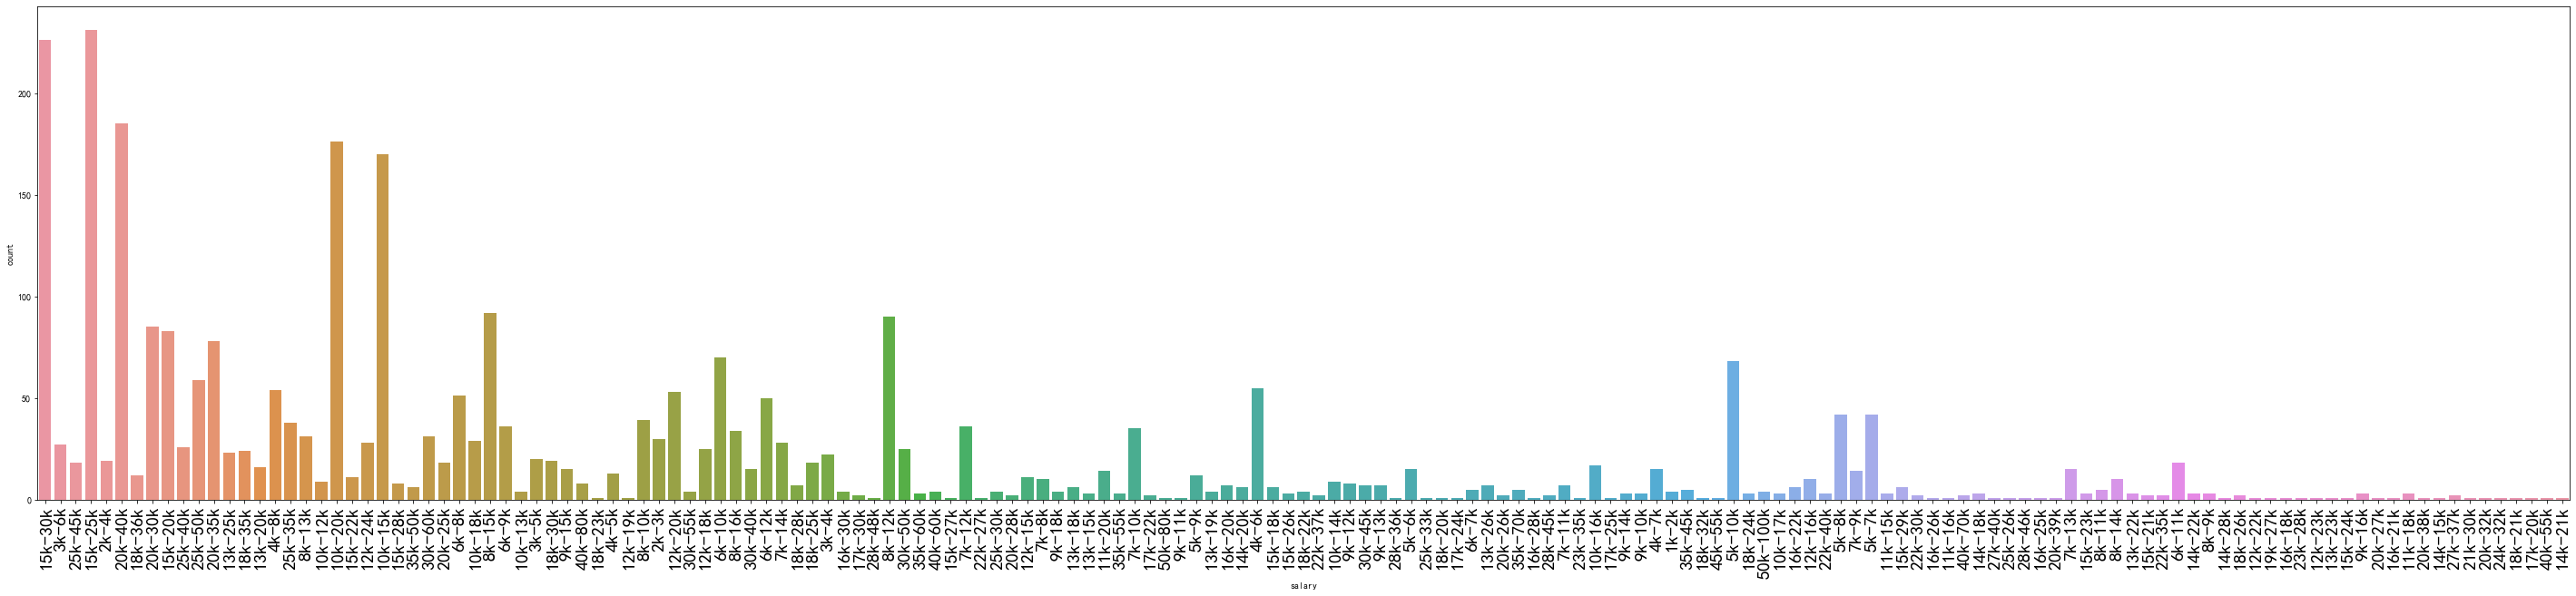

In [10]:
#双击放大图片，发现出现频率最高的是"15k-25k"
plt.figure(figsize = (50,10));
ax = sns.countplot(data = df, x = "salary");
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 20)

In [11]:
#为salary_describe添加新的统计结果
salary_describe["most_frequent"] = "15k-25k";
salary_describe

count                3179
unique                165
top              50k-100k
freq                  231
most_frequent     15k-25k
Name: salary, dtype: object

## 不同城市薪资分布

In [12]:
#查看所有城市
df["city"].unique()
#一切正常

array(['北京', '上海', '深圳', '南京', '武汉', '广州', '杭州', '成都', '重庆'], dtype=object)

In [13]:
#根据城市分组，获取薪资
salByCity = df.groupby("city")["mean_salary"].apply(lambda x: x.map(lambda y: int(y)).mean());
salByCity

city
上海    20.657143
北京    22.591111
南京    13.744286
广州    16.976190
成都    11.730769
杭州    20.442308
武汉    12.600000
深圳    20.841191
重庆    12.333333
Name: mean_salary, dtype: float64

In [14]:
salByCity = salByCity.reset_index();

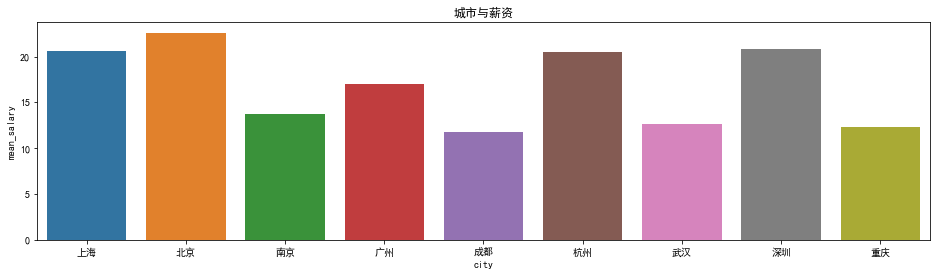

In [15]:
#制图,用barplot方便横向对比
plt.figure(figsize = (16,4));
ax = sns.barplot(data = salByCity, x="city",y = "mean_salary");
ax.set_title("城市与薪资");

上海，北京，广州，杭州，深圳的平均薪资比其他城市多一些

## N薪分布

In [16]:
#默认0指的是正常12薪
Nsalary = df.salaryMonth;
Nsalary

0       14
1        0
2        0
3       14
4        0
        ..
3175    13
3176     0
3177     0
3178     0
3179     0
Name: salaryMonth, Length: 3179, dtype: int64

In [17]:
Nsalary = pd.DataFrame(Nsalary.replace(0,12),columns = ["salaryMonth"]);

In [18]:
Nsalary["salaryMonth"].describe()

count    3179.000000
mean       12.811261
std         1.215170
min        12.000000
25%        12.000000
50%        12.000000
75%        13.000000
max        24.000000
Name: salaryMonth, dtype: float64

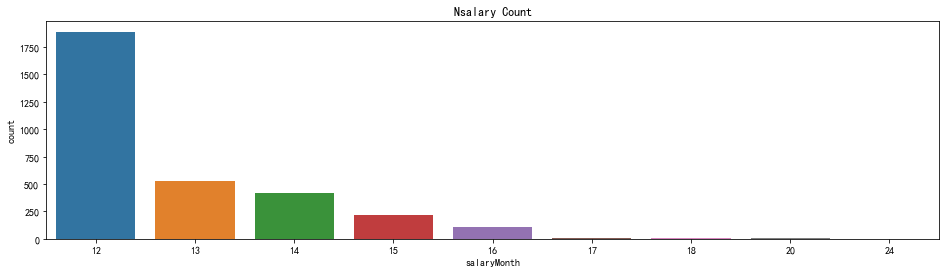

In [19]:
plt.figure(figsize = (16,4));
ax = sns.countplot(data = Nsalary, x = "salaryMonth");
_ = ax.set_title("Nsalary Count");

12薪的人最多，然后逐渐递减,最多到达24薪

## 工作年限与薪资

In [20]:
#先看看工作年限的格式
df["workYear"].unique()

array(['3-5年', '在校/应届', '5-10年', '1-3年', '不限', '1年以下', '10年以上'],
      dtype=object)

In [21]:
#手动把工作年限排序成较为合理的顺序
workYearOrder = ["在校/应届","1年以下","1-3年","3-5年","5-10年","10年以上","不限"];

In [22]:
#获取每个工作年限段对应的平均工资(单位为k)
salByWorkYear = df.groupby("workYear")["mean_salary"].apply(lambda x: x.map(lambda y: int(y)).mean());
salByWorkYear = pd.DataFrame(salByWorkYear)

In [23]:
#将workYear转换成列
salByWorkYear = salByWorkYear.reset_index()
salByWorkYear

,workYear,mean_salary
0,1-3年,12.580178
1,10年以上,44.200000
2,1年以下,8.039216
3,3-5年,20.406446
4,5-10年,27.466993
5,不限,14.551802
6,在校/应届,7.252000


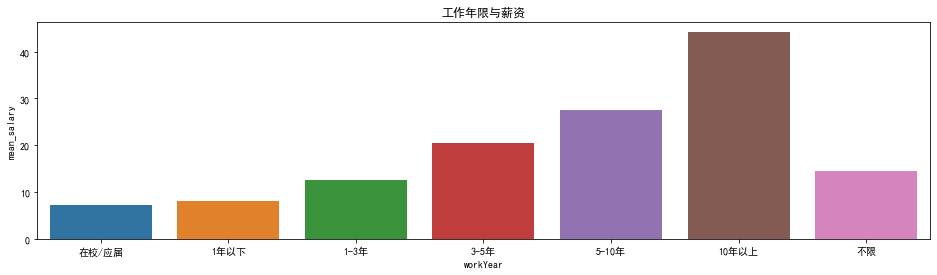

In [24]:
#制图,用barplot方便横向对比
plt.figure(figsize = (16,4));
ax = sns.barplot(data = salByWorkYear, x="workYear",y = "mean_salary" ,order=workYearOrder);
ax.set_title("工作年限与薪资");

可以明显的看到，工作年限越久，平均工资越高

# 2. 职位分析

## 不同城市职位数量

In [25]:
#根据城市分组，获取各个城市所拥有的职位名称
jobsByCity = df.groupby("city")["positionName"].unique()
jobsByCity

city
上海    [数据分析师, 高级数据分析师, 数据分析实习生, 资深数据分析师, 薪酬数据分析专员, 数...
北京    [资深数据分析师, 数据分析实习生, 数据分析师, 数据分析工程师, 游戏数据分析师, 高级...
南京    [数据分析师, 数据分析产品研发负责人-To B, 资深数据分析师, 商品数据分析师 (MJ...
广州    [数据分析师, 高级数据分析师, 资深数据分析师, 数据分析专员, 数据分析, 数据分析实习...
成都    [数据分析师, 资深数据分析师, 数据分析专家, 数据分析专员, 高级数据分析师, 数据分析...
杭州    [高级数据分析师, 电商数据分析师, (高级)数据分析师专家, 数据分析实习生, 数据分析师...
武汉    [数据分析师, 高级数据分析师(大力教育), 数据分析专家, 高级数据分析师, 数据分析工程...
深圳    [资深数据分析师, 数据分析师, 社交媒体数据分析, 022440-数据分析岗, 02420...
重庆    [数据分析师, 数据分析（运营支持）, 数据分析主管, 高级数据分析师, 数据分析专员, 大...
Name: positionName, dtype: object

In [26]:
#对数据进行处理，使每一个岗位被分开计算
jobsByCity = jobsByCity.reset_index();
jobsByCity["positionName"] = jobsByCity["positionName"].apply(lambda x: "|".join(x))
#记录一下city列
tmp = jobsByCity["city"] 
jobsByCity = jobsByCity["positionName"].str.split(r"|",expand = True);
jobsByCity["city"] = tmp;
jobsByCity.head()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,city
0,数据分析师,高级数据分析师,数据分析实习生,资深数据分析师,薪酬数据分析专员,数据分析专家,抖音高级数据分析师,0231VS-数据建模设计岗,数据分析工程师,BK41XN-数据分析岗,...,None,None,None,None,None,None,None,None,None,上海
1,资深数据分析师,数据分析实习生,数据分析师,数据分析工程师,游戏数据分析师,高级数据分析师,数据分析专家,高级/资深渠道数据分析,数据分析营销课讲师,数据分析,...,None,None,None,None,None,None,None,None,None,北京
2,数据分析师,数据分析产品研发负责人-To B,资深数据分析师,商品数据分析师 (MJ002892),数据分析专家,数据分析 (MJ011252),数据分析（南京）,高级数据分析师,数据分析师（浏览器/小视频）(003521),医药数据分析师(疫苗方向),...,None,None,None,None,None,None,None,None,None,南京
3,数据分析师,高级数据分析师,资深数据分析师,数据分析专员,数据分析,数据分析实习生,数据分析（MJ000593）,国际化广告数据分析师,电商客服主任（数据分析）,大数据分析师,...,None,None,None,None,None,None,None,None,None,广州
4,数据分析师,资深数据分析师,数据分析专家,数据分析专员,高级数据分析师,数据分析实习生,数据分析（建模方向）,高级数据分析工程师 (MJ000753),商业数据分析师,高级数据分析师 (MJ000551),...,None,None,None,None,None,None,None,None,None,成都


In [27]:
#先用set_index把city变为索引（用于保留city不被stack变为行内数据），再使用stack将职位列堆叠起来，用droplevel舍弃最开始的index，再用reset_index将city重新变为列,最后用rename重新命名
jobsByCity = jobsByCity.set_index("city").stack().droplevel(1).reset_index().rename({0:"jobs"},axis = 1);
jobsByCity

,city,jobs
0,上海,数据分析师
1,上海,高级数据分析师
2,上海,数据分析实习生
3,上海,资深数据分析师
4,上海,薪酬数据分析专员
...,...,...
1680,重庆,项目运营岗（流程管理）
1681,重庆,流程专员
1682,重庆,高级数据架构师
1683,重庆,软件工程师-实习生


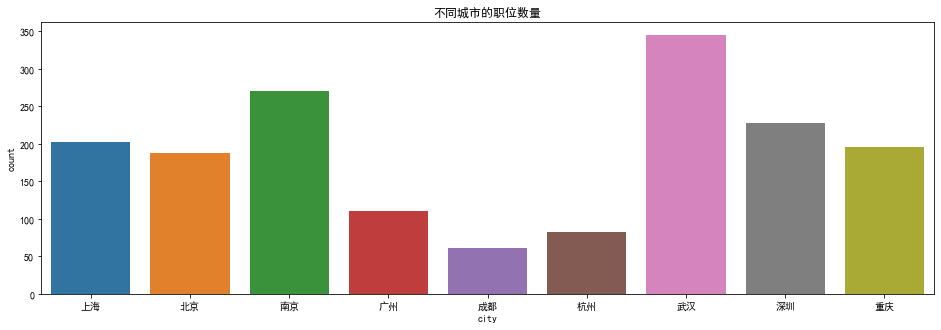

In [28]:
#用cocuntplot绘制图
plt.figure(figsize = (16,5));
ax = sns.countplot(data = jobsByCity, x = "city");
_ = ax.set_title("不同城市的职位数量")

武汉的职位数量大约位350，超出其他城市至少20%

## 公司融资情况

In [29]:
#查看融资情况的数据格式
df.financeStage.unique()

array(['D轮及以上', '不需要融资', 'A轮', '上市公司', 'B轮', 'C轮', '未融资', '天使轮'],
      dtype=object)

In [30]:
#看一下都有哪些公司,可以使用全称，但接下来将会使用shortname以便让数据更加清晰
df.companyShortName.unique().size
#发现有许多公司，决定同样使用stack方法制作一个df对象，index为融资情况，column为公司名（细长的一张表）

1471

In [31]:
#根据融资情况分组，获取所有公司的名字
compByFin = df.groupby("financeStage").companyShortName.unique()
compByFin

financeStage
A轮       [京东物流, 中电博亚, 拉克沙LAKSA, 音悦荚, 赛目科技, 悦福享, 集侦云, Da...
B轮       [鲸鱼外教培优, 易观, 小帮规划, 哗啦啦, 石墨文档, 斗米, 转转, 数数科技, 欢忻...
C轮       [乐约健康, 省钱快报, 果壳, 柏睿数据, 豌豆思维, 轻松集团, 资产360, 掌上先机...
D轮及以上    [拉勾网, 字节跳动, 小叶子The ONE, 爱回收, 每日优鲜, 闪送, 唱吧-玩音乐，...
上市公司     [小米集团, 360数科, 老虎集团, 贝壳, 掌阅, 紫光教育, 当当网, 赤子城, ca...
不需要融资    [欧科云链集团, 民生科技, 边锋, 琥珀创想, 泰康保险集团, Riley Cillian...
天使轮      [YoungGee, 众泽睿诚, 想出网络科技, 格蓝威驰科技, 上海荟力, 华信集团, 企...
未融资      [微淼财商, 地坪线, Dilato, 硅基远航, 国美金控, 融易推, 越博华阳商务服务,...
Name: companyShortName, dtype: object

In [32]:
#同样的，处理数据使得所有公司分开作为单独列计算
compByFin = compByFin.reset_index();
compByFin["companyShortName"] = compByFin["companyShortName"].apply(lambda x: "|".join(x));
tmp = compByFin.financeStage;
compByFin = compByFin["companyShortName"].str.split("|",expand = True);
compByFin["financeStage"] = tmp;
compByFin

,0,1,2,3,4,5,6,7,8,9,...,423,424,425,426,427,428,429,430,431,financeStage
0,京东物流,中电博亚,拉克沙LAKSA,音悦荚,赛目科技,悦福享,集侦云,DataHunter,粉笔网,普罗,...,None,None,None,None,None,None,None,None,None,A轮
1,鲸鱼外教培优,易观,小帮规划,哗啦啦,石墨文档,斗米,转转,数数科技,欢忻网络,漫微科技,...,None,None,None,None,None,None,None,None,None,B轮
2,乐约健康,省钱快报,果壳,柏睿数据,豌豆思维,轻松集团,资产360,掌上先机-旺店通ERP,TalkingData,Trusfort芯盾时代,...,None,None,None,None,None,None,None,None,None,C轮
3,拉勾网,字节跳动,小叶子The ONE,爱回收,每日优鲜,闪送,唱吧-玩音乐，就上唱吧！,思维造物,北京花房科技有限公司,探探,...,None,None,None,None,None,None,None,None,None,D轮及以上
4,小米集团,360数科,老虎集团,贝壳,掌阅,紫光教育,当当网,赤子城,capgemini,金山世游,...,None,None,None,None,None,None,None,None,None,上市公司
5,欧科云链集团,民生科技,边锋,琥珀创想,泰康保险集团,Riley Cillian莱熙科技,滴滴,明翰,北京乐途原动力,高济医疗,...,慧商实业,搜利得,创弘电子商务,西西弗书店,毛毛虫电商,申盾通信,哒啦啦化妆品,星创医药,倍丝露电子商务,不需要融资
6,YoungGee,众泽睿诚,想出网络科技,格蓝威驰科技,上海荟力,华信集团,企鹅吃喝,医药魔方,数据之家,物界（上海）科技有限公司,...,None,None,None,None,None,None,None,None,None,天使轮
7,微淼财商,地坪线,Dilato,硅基远航,国美金控,融易推,越博华阳商务服务,储慧国际咨询,佰诺全景,纵横文学,...,None,None,None,None,None,None,None,None,None,未融资


In [33]:
#与“不同城市职位数量”一样的做法
compByFin = compByFin.set_index("financeStage").stack().droplevel(1).reset_index().rename({0:"companyShortName"},axis = 1);
compByFin
#这里可以看到所有公司的融资情况

,financeStage,companyShortName
0,A轮,京东物流
1,A轮,中电博亚
2,A轮,拉克沙LAKSA
3,A轮,音悦荚
4,A轮,赛目科技
...,...,...
1468,未融资,重庆渝万传媒集团有限公司
1469,未融资,悦智峰
1470,未融资,江小白
1471,未融资,云易玺


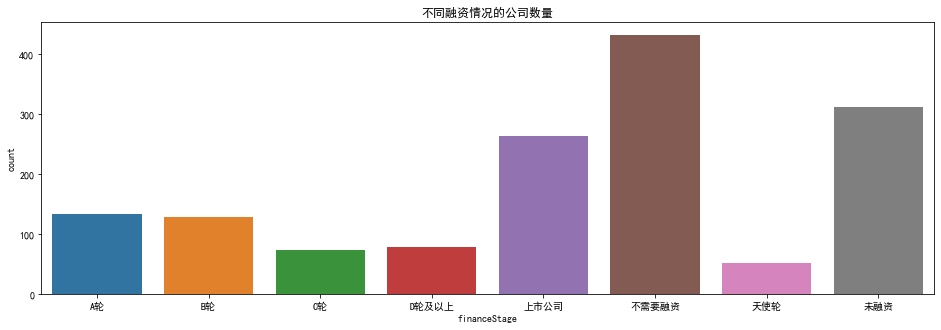

In [34]:
#用cocuntplot绘制图
plt.figure(figsize = (16,5));
ax = sns.countplot(data = compByFin, x = "financeStage");
_ = ax.set_title("不同融资情况的公司数量")

按排名，不需要融资，未融资，和上市公司的数量最多

## 不同行业公司数量

In [35]:
#有4个缺省值，可以直接舍弃
df["industryField"].isnull().sum()

4

In [36]:
df.dropna(subset=["industryField"],inplace = True)

In [37]:
#发现格式一般都是行业之间用,或者|分割开
df.industryField.unique()

array(['企业服务', '内容资讯,短视频', '区块链', '工具类产品,在线教育', '金融业,科技金融', '物流｜运输', '游戏',
       '工具类产品', '在线教育', '智能硬件,电商平台', '科技金融', '电商平台', '居住服务',
       '内容社区,音频｜视频媒体', '人工智能服务', '物流平台', '内容社区', '金融业', '社交媒体', '旅游｜出行',
       '数据服务｜咨询', '移动互联网,游戏', '移动互联网,企业服务', '移动互联网,社交', '软件服务｜咨询', '社交平台',
       '营销服务｜咨询', '教育、数据服务', '新零售,电商平台', '专业服务｜咨询', '生活服务', '移动互联网,电商',
       'IT技术服务｜咨询', '影视｜动漫', '教育｜培训', '短视频', '内容资讯,社交媒体', '软件服务｜咨询,在线医疗',
       '内容资讯,游戏,音频｜视频媒体', '短视频,新零售', '金融', '音频｜视频媒体', '制造业', 'MCN｜直播平台',
       '其他', '分类信息,消费生活', '软件服务｜咨询,数据服务｜咨询,人工智能服务', '数据服务｜咨询,营销服务｜咨询',
       '工具类产品,软件服务｜咨询', '汽车交易平台', '物联网', '硬件,软件开发', '硬件,电商', '内容资讯',
       '数据服务｜咨询,营销服务｜咨询,IT技术服务｜咨询', '教育', '通讯电子', '旅游｜出行,生活服务',
       '移动互联网,其他', 'IT技术服务｜咨询,智能硬件,能源｜矿产｜环保', '旅游', '医疗丨健康,企业服务',
       'IT技术服务｜咨询,软件服务｜咨询,数据服务｜咨询', '移动互联网,数据服务', '工具类产品,信息检索,信息安全',
       '企业服务,广告营销', '移动互联网,消费生活', '消费生活', '电商', '软件服务｜咨询,IT技术服务｜咨询',
       '房地产｜建筑｜物业', '数据服务｜咨询,人工智能服务', '软件服务｜咨询,智能硬件', '汽车丨出行',
       '人工智能服务,智能硬件', 'IT技

In [38]:
#提取需要的两列(公司，行业)
tmp = df[["companyShortName","industryField"]]
tmp.head()

,companyShortName,industryField
0,拉勾网,企业服务
1,字节跳动,"内容资讯,短视频"
2,欧科云链集团,区块链
3,欧科云链集团,区块链
4,拉勾网,"工具类产品,在线教育"


In [39]:
#用str.split方法分割行业（一开始以为只有逗号和|，经过后面的分析才发现总共有5种分割的格式）
company = tmp.companyShortName;
tmp = tmp.industryField.str.split(r"[,｜丨、\s]",expand=True);
tmp["company"] = company;
tmp

,0,1,2,3,4,5,company
0,企业服务,None,None,None,None,None,拉勾网
1,内容资讯,短视频,None,None,None,None,字节跳动
2,区块链,None,None,None,None,None,欧科云链集团
3,区块链,None,None,None,None,None,欧科云链集团
4,工具类产品,在线教育,None,None,None,None,拉勾网
...,...,...,...,...,...,...,...
3175,游戏,社交媒体,音频,视频媒体,None,None,腾讯
3176,数据服务,咨询,None,None,None,None,药智网
3177,数据服务,咨询,None,None,None,None,药智网
3178,金融,None,None,None,None,None,重庆道微投资


In [40]:
#设置公司为index来将其排除stack的作用范围，用stack将所有行业转换成一列，用droplevel舍弃无用的默认索引，用reset_index将公司名改回列以方便制表
tmp = tmp.set_index("company").stack().droplevel(1).reset_index().rename({0:"Field"},axis = 1);
tmp

,company,Field
0,拉勾网,企业服务
1,字节跳动,内容资讯
2,字节跳动,短视频
3,欧科云链集团,区块链
4,欧科云链集团,区块链
...,...,...
5876,药智网,咨询
5877,药智网,数据服务
5878,药智网,咨询
5879,重庆道微投资,金融


In [41]:
#按照行业对公司进行分组
companyByField = tmp.groupby("Field");
#统计不同行业的公司数量
counts = pd.DataFrame(companyByField.count()).reset_index().rename({"company":"count"},axis = 1);
counts

,Field,count
0,IT技术服务,165
1,MCN,28
2,不限,3
3,专业服务,40
4,人工智能,23
...,...,...
79,通讯电子,6
80,金融,79
81,金融业,51
82,零售,38


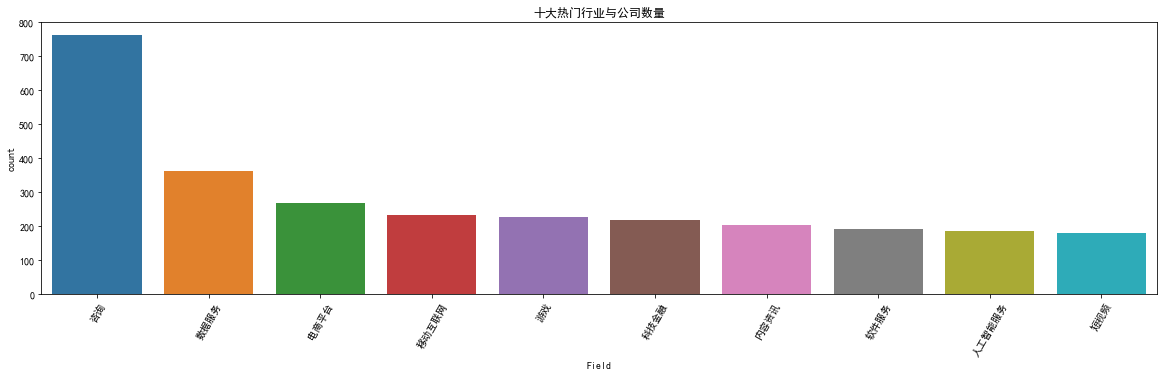

In [42]:
#绘图,因为总共有103个行业，仅绘制最热门的10个行业
counts.sort_values(by = "count",ascending = False,inplace = True);
plt.figure(figsize = (20,5));
ax = sns.barplot(data = counts[:10], x = "Field", y ="count");
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 60);
ax.set_title("十大热门行业与公司数量");

## 工作经验分析

In [43]:
#工作经验主要可以参考工作年限
workYears = df.workYear;
workYears

0        3-5年
1       在校/应届
2       5-10年
3        1-3年
4        1-3年
        ...  
3175     3-5年
3176    5-10年
3177     1-3年
3178       不限
3179       不限
Name: workYear, Length: 3175, dtype: object

In [44]:
#同样的，top因为用的是字符串的排序方式，和我们想要的最高工作年限不一样
workYears_describe = workYears.describe();

In [45]:
#可以看出来最长时间的工作年限是10年以上标签
workYears.unique()

array(['3-5年', '在校/应届', '5-10年', '1-3年', '不限', '1年以下', '10年以上'],
      dtype=object)

In [46]:
workYears_describe["top"] = "10年以上"

In [47]:
workYears_describe

count      3175
unique        7
top       10年以上
freq       1115
Name: workYear, dtype: object

<AxesSubplot:xlabel='workYear', ylabel='count'>

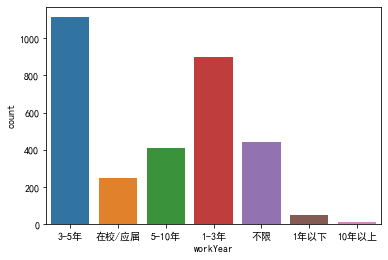

In [48]:
#用一个countplot图表可以快速看出出现频率最高的是3-5年
sns.countplot(data = df, x = "workYear")

In [49]:
workYears_describe["most_frequent"] = "3-5年";
workYears_describe

count             3175
unique               7
top              10年以上
freq              1115
most_frequent     3-5年
Name: workYear, dtype: object

## 职位标签：词云制作

#### 在制作词云之前需要先统计各职位标签出现的次数

In [50]:
lables = pd.DataFrame(df.positionLables);
#把字符串['xxx','xxx']变为xxx,xxx以方便之后拆分各个标签
def normaliseStr(s):
    res = "";
    for c in s:
        if c.isalnum() or c == ",":
            res += c;
    return res;
    
lables.positionLables = lables.positionLables.map(normaliseStr);
lables

,positionLables
0,数据分析
1,后端开发
2,数据分析
3,"商业,SQL,数据分析"
4,"数据分析,hive,SQL"
...,...
3175,"体系,指标,项目管理,过程管理,数据分析,指标管理"
3176,产品策划
3177,数据服务咨询
3178,"科技金融,金融业,软件开发"


In [51]:
#拆分标签，然后用stack合为1列
lables = pd.DataFrame(lables["positionLables"].str.split(r",",expand=True).stack().droplevel(1),columns = ["positionLables"]);
lableCounts = lables.value_counts();
lableCounts

positionLables
数据分析              977
电商平台              286
SQL               214
运营                200
Python            196
                 ... 
优化                  1
会员运营                1
会展拓展                1
体系                  1
广告投放系统              1
Length: 1027, dtype: int64

In [52]:
lableCounts = pd.DataFrame(lableCounts,columns = ["count"]);
lableCounts

,count
positionLables,
数据分析,977
电商平台,286
SQL,214
运营,200
Python,196
...,...
优化,1
会员运营,1
会展拓展,1


## 以下是制作词云图的代码，如无法运行，可用pip安装wordcloud或者直接打开wordcloud.jpg文件查看词云图

In [53]:
#生成词云图需要的txt文件
f = open("wordCounts.txt","w",encoding="utf-8");
df = pd.DataFrame(lableCounts.reset_index(),columns = ["positionLables","count"])
for i,row in enumerate(df.iterrows()):
    lable = row[1]["positionLables"];
    count = row[1]["count"];
    line = ((lable + " ")*count).strip() + "\n";
    f.write(line);
f.close();

In [54]:
#制作词云图可以使用wordcloud第三方库
#pip install wordcloud
import wordcloud

In [55]:
#如果报错，可能是pillow版本过低，可以用以下代码更新
#pip install --upgrade pillow
font_path = "SourceHanSansSC-Normal.otf";
imgPath = "wordcloud.jpg";
wc = wordcloud.WordCloud(font_path=font_path, background_color="white", max_words=1000,
               max_font_size=100, random_state=42, width=1000, height=860, collocations=False);
f = open("wordCounts.txt","r",encoding="utf-8");
lines = f.readlines();
words = "";
for line in lines:
    words += line;
wc.generate(words);
wc.to_file(imgPath);